# 4.0 線形識別モデル

分類問題を解くとは

> 分類の目的はある入力ベクトル$x$を$K$個の離散クラス$C_k$の一つに割りあてる事

線形識別モデルとは

> 線形識別モデルとは、$D$次元入力空間に対して、入力ベクトル$x$を未知数とする方程式で表される決定面が、$D-1$次元の超平面で定義されるもの。

2クラス(顔認識) or 多クラス(人物認識)

## 識別の3つのアプローチ

1章、1.5.4あたりの復習

### 識別関数 (discriminant function)

入力ベクトル$x$から直接クラスを推定する関数を作る

### 生成モデル (generative model)

$P(C_k|x)$ を $C_k$ 毎に求め、$P(C_k)$も求める。

ここからベイズルールで事後確率を求める

$\displaystyle
P(C_k|x) = \frac{p(x|C_k)p(C_k)}{p(x)}$

![gazou](./images/fig1.27.png)

P43 図1.27

### 識別モデル (discriminative model)

条件付き確率分布$P(C_k|x)$を直接モデル化

> 例えば、条件付き確率分布をパラメトリックモデルで表現し、学習データ集合を使ってそのパラメータを最適化する

一般化線形モデル → 確率分布、線形予測子、リンク関数!!

例えばこんな手順

1. $C_k$について適切な確率分布を決める、例えばベルヌーイ分布
2. $x$をパラメータに持つ関数を作る、例えば $w_1x + w_0$
3. $x$の関数を何らかの関数に入れた物を$P(C_k|x)$のパラメータとする、例えばシグモイド関数 → ロジスティック回帰
  - $P(C_1|x) = Bern[sig[w_0 + w_1x]]$
4. 訓練データを使って$w_0$, $w_1$ を求める



## 4.1 識別関数 (判別関数)

### 4.1.1 2クラス

もっとも簡単な線形識別関数の表現

$y(x) = w^Tx + w_0$

- $w$は重みベクトル(weight vector)
- $w_0$はバイアスパラメータ

$y(x) \geq 0$ ならば、入力ベクトル$x$はクラス$C_1$に割りあてられる、それ以外はクラス$C_2$

### ベクトル$w$

決定面上の二点を結ぶベクトルとの内積がゼロ、つまり$w$は決定面上のベクトルに直行している。

### 原点から決定面までの距離

原点からの距離を$r$として

$0 = w^Tx + w_0$ に代入すると $\displaystyle
0 = w^T\frac{r\cdot w}{||w||} + w_0$ 

これを $r$ について解くと

$\displaystyle
r = \frac{-w_0}{||w||}$

### 決定面から点$x$への直行距離

直行距離を$r$とすると、決定面への直行ベクトルは $\displaystyle\frac{r\cdot w}{||w||}$ となる。$x - \displaystyle\frac{r\cdot w}{||w||}$ は決定面上の点を指すため、$0 = w^Tx + w_0$ に代入すると

$\displaystyle
w^T\{x-\frac{r\cdot w}{||w||}\} + w_0 = 0$

これを$r$について解くと

$\displaystyle
r = \frac{w^Tx + w_0}{||w||} = \frac{y(x)}{||w||}$

![図4.1](./images/fig4.1.png)

## 4.1.2 多クラス

- 1対他分類器 (one-versus-the-rest classifier)
- 1対1分類器 (one-versus-one classifier)

実装は[scikit-learnのOneVSOneClassifier等にみられる](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-one)  
これの組みあわせでは曖昧な領域ができてしまう。

K個の線形関数からなる単独の$K$クラス識別を考えると、これらの問題を避ける事ができる。

$y_k(x) = w_{k}^{T}x + w_{k0}$

## 4.1.3 分類における最小二乗

最小二乗法でKクラスの分類問題を解析的に解く事ができるが、精度はよくない。

### Figure 4.4 外れ値に敏感な事を示す図
![図4.4](./images/fig4.4.png)

### Figure 4.5 誤分類している図
![図4.5](./images/fig4.5.png)


## 4.1.4 フィッシャーの線形判別

クラスの分類を最大にする射影を選択するアプローチ

In [98]:
N = 30
c0_x = np.random.normal(1.8, 2, N)
c0_y = np.random.normal(3, 0.4, N)
c1_x = np.random.normal(5, 2, N)
c1_y = np.random.normal(1.8, 0.4, N)
c0 = np.array([c0_x, c0_y]).T
c1 = np.array([c1_x, c1_y]).T

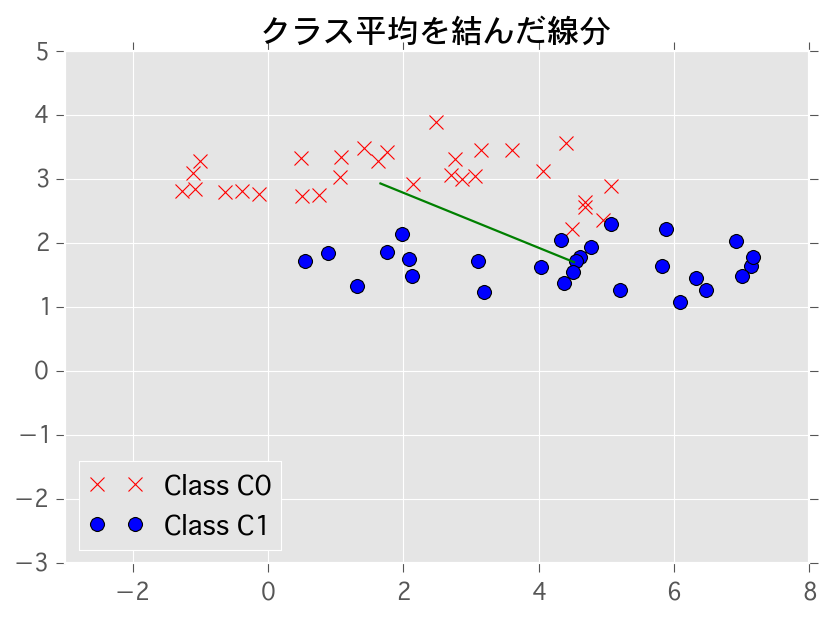

In [102]:
plt.plot(c0_x, c0_y, 'rx', label='Class C0')
plt.plot(c1_x, c1_y, 'bo', label='Class C1')
plt.plot([c0_mean[0], c1_mean[0]], [c0_mean[1], c1_mean[1]], 'g')
plt.legend(loc=3)
plt.xlim(-3, 8)
plt.ylim(-3, 5)
plt.title(u'クラス平均を結んだ線分')